In [ ]:
import matplotlib.pyplot as plt
import os
import PIL
from PIL import Image
from numpy import asarray
import cv2
import numpy as np
DataDir = 'Datasets/kagglecatsanddogs_3367a/PetImages'
Categories = ["Dog", "Cat"]


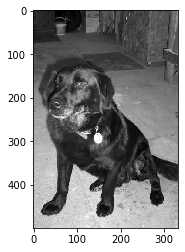

In [ ]:
DataDir = '/Volumes/Data2/Animesh/Python/Sklearn-Work/Datasets/kagglecatsanddogs_3367a/PetImages'
Categories = ['Dog', 'Cat']

for category in Categories:
    path = os.path.join(DataDir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

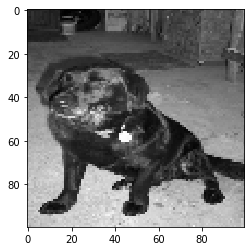

In [ ]:
Img_Size = 50

new_array = cv2.resize(img_array, (Img_Size,Img_Size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in Categories:
        path = os.path.join(DataDir, category)
        class_n = Categories.index(category)
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (Img_Size,Img_Size))
                training_data.append([new_array, class_n])
            except Exception as e:
                pass
        
create_training_data()

In [ ]:
training_data[:5]

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
X= []
y= []

for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, Img_Size, Img_Size)
y= np.array(y)

np.save('X_',X)
np.save('y_',y)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

X = np.load('/content/drive/My Drive/Python/PythonFolder/Sklearn-Work/X_.npy')
y = np.load('/content/drive/My Drive/Python/PythonFolder/Sklearn-Work/y_.npy')

In [3]:
print(type(X))
print(type(y))
X = np.reshape(X, (X.shape[0],*X.shape[1:],1))
print(X.shape)
print(y.shape)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(24946, 50, 50, 1)
(24946,)


In [4]:
#Making the CNN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#Normalie data

X = X/255.0

model = Sequential()

model.add(Conv2D(64,(3,3),activation = 'relu', input_shape=(50,50,1))) #(Neurons, Window Dimension, input data shape)

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu')) #(Neurons, Window Dimension, doesn't need input shape)

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) #Flatten data to one dimension becuase Final Dense layer only accepts one dimensional input
model.add(Dense(64,activation = 'relu'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) #binary since cats or dogs (0 or 1)
model.fit(X,y,batch_size=10,epochs=3,validation_split=0.1) #validation split is test batch size

Epoch 1/3
2246/2246 [==============================] - 8s 3ms/step - loss: 0.6321 - accuracy: 0.6371 - val_loss: 0.5579 - val_accuracy: 0.7122
Epoch 2/3
2246/2246 [==============================] - 7s 3ms/step - loss: 0.5215 - accuracy: 0.7438 - val_loss: 0.5460 - val_accuracy: 0.7234
Epoch 3/3
2246/2246 [==============================] - 7s 3ms/step - loss: 0.4710 - accuracy: 0.7776 - val_loss: 0.4931 - val_accuracy: 0.7623
